# Visualizing The Data 
Data Science / Analytics is all about finding valuable insights from the given dataset. In short, Finding answers that could help business. Data visualization is the discipline of trying to understand data by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed.

Python's plotting libraries include :
* Matplotlib: low level, provides lots of freedom
* Pandas Visualization: easy to use interface, built on Matplotlib
* Seaborn: high-level interface, great default styles
* ggplot: based on R’s ggplot2, uses Grammar of Graphics
* Plotly: can create interactive plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Setting a style and size for all the graphs so it doesn't have to be done manually.

In [2]:
sns.set_style('darkgrid')
sns.color_palette("husl", 9)
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 14

## Bar Plots

In [3]:
dataset1 = pd.read_csv("datasets/IPL-matches.csv")

In [4]:
dataset1.head(3)

,Id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


### Most successful team overall

<AxesSubplot:xlabel='winner'>

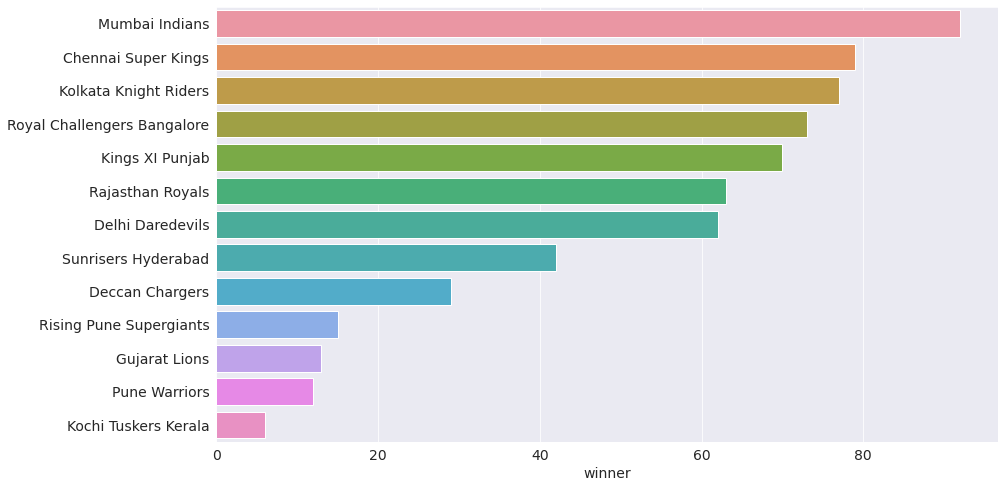

In [5]:
team_wins = dataset1.winner.value_counts()
sns.barplot(y = team_wins.index, x = team_wins)

### Players with most player of the matches

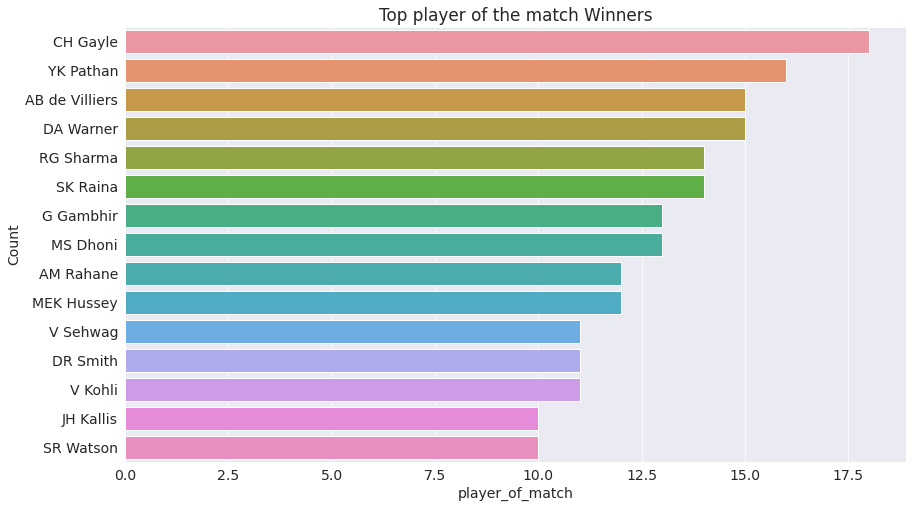

In [6]:
top_players = dataset1.player_of_match.value_counts()[:15]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
sns.barplot(y = top_players.index, x = top_players, orient='h');
plt.show()

### Stadiums with most matches played

<AxesSubplot:xlabel='venue'>

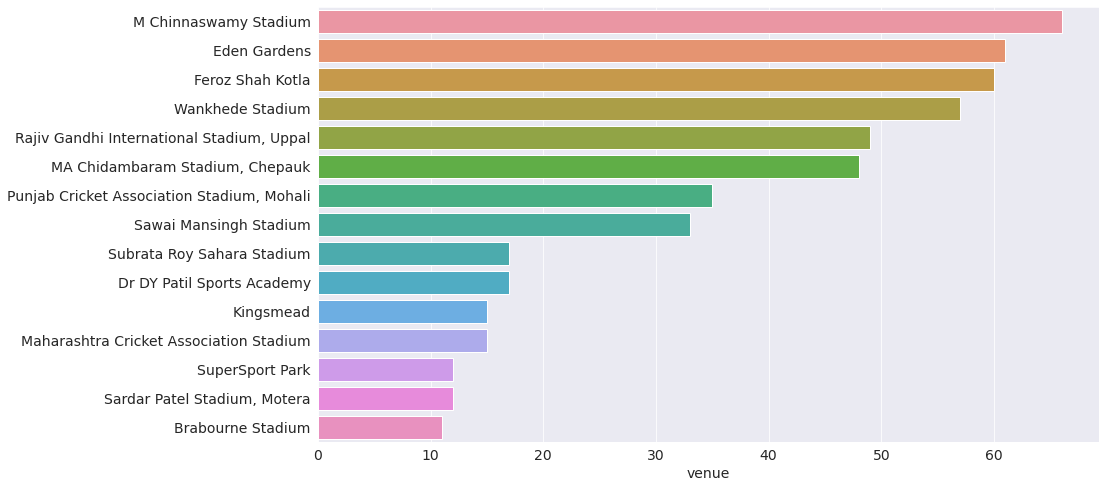

In [7]:
venues = dataset1['venue'].value_counts()[:15]
sns.barplot(y = venues.index, x = venues, orient='h')

### Teams that won the most number of toss

<AxesSubplot:xlabel='toss_winner'>

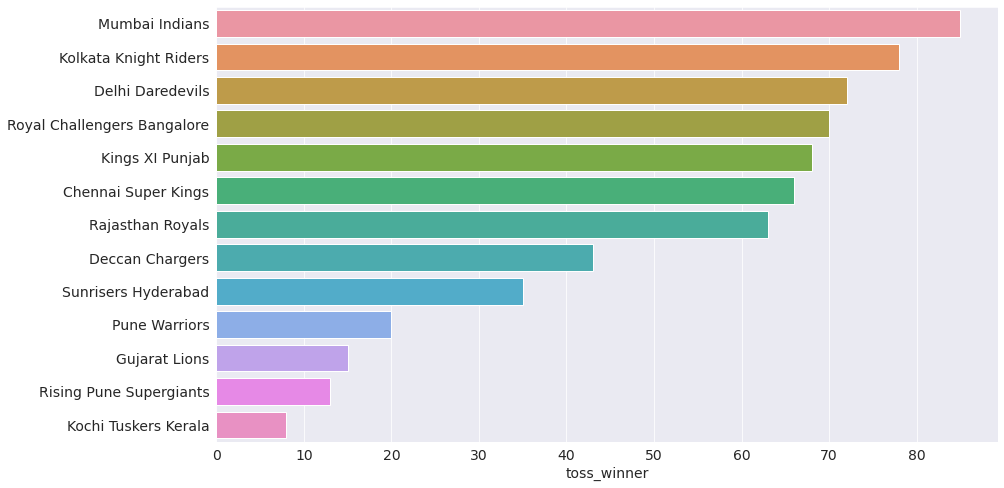

In [8]:
teams_toss = dataset1.toss_winner.value_counts()
sns.barplot(y = teams_toss.index, x = teams_toss, orient='h')

## Piecharts

### Has Toss-winning helped in Match-winning?

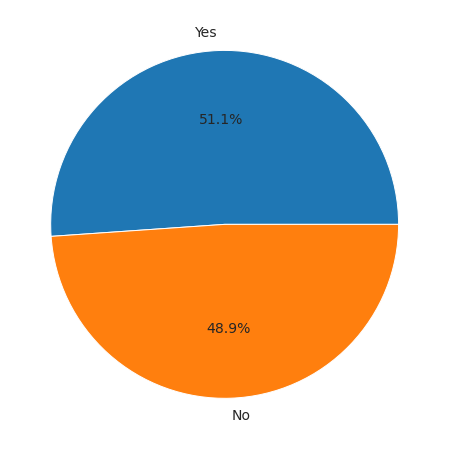

In [9]:
ss = dataset1['toss_winner'] == dataset1['winner']
true = [i for i in ss if i == True]
false = [i for i in ss if i == False]
labels = 'Yes','No'
sizes = [len(true),len(false)]
fig,ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

### Which has had more success, chasing or defending?

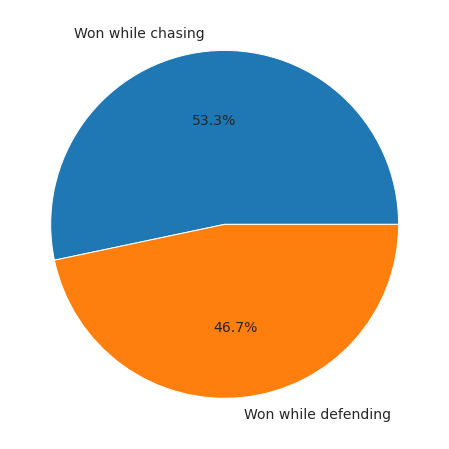

In [10]:
win_by = dataset1['win_by_wickets'] > 0
chasing = [i for i in win_by if i == True]
defending = [i for i in win_by if i == False]
labels = 'Won while chasing','Won while defending'
sizes = [len(chasing),len(defending)]
fig,ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()